### ML : KNN model

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# 데이터 불러오기
# train data 사용
df = pd.read_csv("./data/train_dataset.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [13]:
# Data set preprocessing
# Normalized, MinMax Scaler
import sklearn
from sklearn.model_selection import train_test_split
    
X = df.drop(columns=['length', 'filename','label', 'tempo']) 
y = df['label'] #장르명

scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns=X.columns)

X.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.407076,0.627767,0.292194,0.134942,0.292122,0.034784,0.459205,0.093785,0.346153,0.082985,...,0.363613,0.053780,0.366457,0.078782,0.371828,0.069005,0.380831,0.041538,0.439964,0.046579
1,0.420732,0.566776,0.252048,0.055547,0.301923,0.018716,0.470831,0.051900,0.363722,0.051509,...,0.468596,0.090588,0.318648,0.088249,0.362068,0.095213,0.418452,0.127750,0.537929,0.064369
2,0.427418,0.642631,0.295819,0.177082,0.295598,0.023073,0.494051,0.059564,0.378215,0.060637,...,0.479681,0.094390,0.391477,0.060389,0.400536,0.084172,0.433742,0.067958,0.484832,0.034845
3,0.457417,0.575606,0.297091,0.093796,0.265663,0.023187,0.455246,0.065878,0.329587,0.070725,...,0.386258,0.065607,0.356265,0.060363,0.380430,0.062379,0.405824,0.064947,0.502930,0.033656
4,0.407384,0.591438,0.321407,0.065176,0.260129,0.016451,0.451651,0.047468,0.318453,0.046730,...,0.438567,0.040046,0.432816,0.100007,0.388590,0.095412,0.409019,0.032185,0.452642,0.030491


In [14]:
# Data Split

X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5592, 56) (5592,)
(1398, 56) (1398,)


In [15]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k=1
clf=KNeighborsClassifier().fit(X_train, y_train)
print(clf)

yhat=clf.predict(X_test)
print('Train set Accuracy : ', metrics.accuracy_score(y_train, clf.predict(X_train)))
print('Test set Accuracy : ', metrics.accuracy_score(y_test, yhat))


KNeighborsClassifier()
Train set Accuracy :  0.9488555078683834
Test set Accuracy :  0.9148783977110158


In [16]:
Ks=10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = clf.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

print(mean_acc)

[0.94134478 0.91702432 0.92846924 0.91845494 0.9148784  0.90629471
 0.90915594 0.90128755 0.89771102]


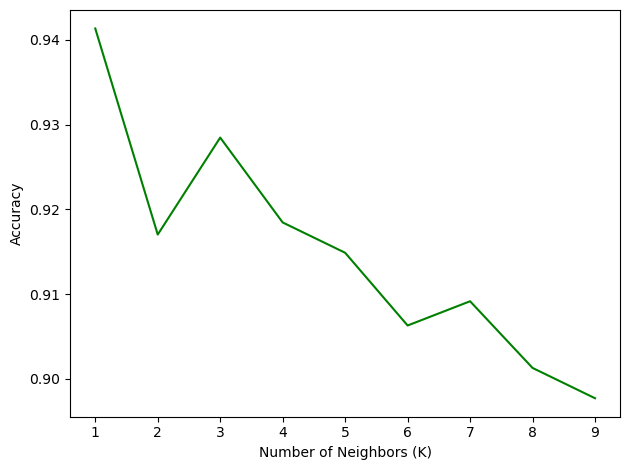

In [17]:
# KNN visualization
# 가장 정확도가 높은 k값 도출, k=1
plt.plot(range(1, Ks), mean_acc, 'g')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [18]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9413447782546495 with k= 1


In [19]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, yhat)

array([[144,   1,   0,   0,   0,   3,   0,   0,   4,   1],
       [  0, 131,   1,   0,   0,   2,   0,   0,   0,   2],
       [  3,   1, 127,   3,   0,   3,   0,   0,   6,   2],
       [  1,   1,   4, 130,   0,   2,   0,   3,   1,   1],
       [  2,   2,   1,   9, 126,   0,   0,   1,   3,   0],
       [  2,  17,   3,   0,   0, 125,   0,   1,   0,   1],
       [  0,   1,   0,   2,   0,   0, 128,   0,   0,   4],
       [  0,   0,   3,   8,   2,   2,   0, 114,   2,   2],
       [  0,   0,   2,   2,   2,   2,   1,   0, 132,   0],
       [  3,   2,   6,   3,   0,   3,   1,   1,   2,  98]])

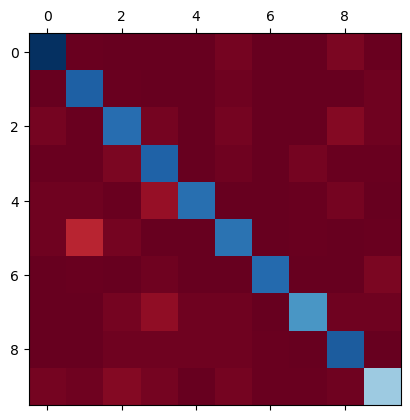

In [20]:
cmf = confusion_matrix(y_test, yhat)
plt.matshow(cmf, cmap=plt.cm.RdBu)
plt.show()